# Training a CNN on the CIFAR-10 dataset

#### Types of datasets when working with classifiers.
- Image datasets
- Text datasets
- Audio datasets

#### Data conversion / preprocessing.
> Use a python packages that load data into a numpy array. Then you can convert this array into a torch.*Tensor

#### Packages generally used.
- Image datasets: Pillow, OpenCV
- Text datasets: NLTK, SpaCy
- Audio datasets: Librosa, SciPy

### CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

<img title="CIFAR10" alt="CIFAR10 Classes" src="images/cifar-classes.png">

### Traing an image classifier for CIFAR-10 dataset

1. Load and normalize the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
# The output of torchvision datasets are PILImage images of range [0, 1]. 
# Transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,
    download=False
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False,
    download=False,
    num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
            'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [01:16<00:00, 2226489.61it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


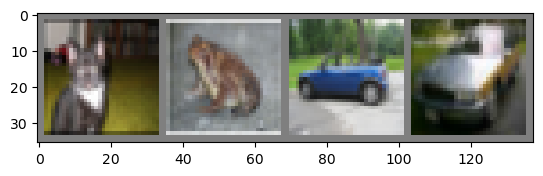

cat   frog  car   car  


In [3]:
# Print training images
import matplotlib.pyplot as plt
import numpy as np

# Function to show image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a random training image
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Plot image
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))